# Problem Statement:
**Zshoes.com is one of the famous shoe manufacturers of India and has business in
almost every country in Asia and Europe. They are one of the best choices of all the
athletics and they make the best shoes for running. Due to pandemic, they are facing a
loss as Zshoes are a bit expensive. They want to know the correct price of all types of
shoes that they are manufacturing so that they won’t face any loss and at the same
time customers also buy the shoes. As a machine learning engineer, we have to build a
shoe-price prediction app that can predict the correct shoe price by taking inputs like
freight_value,payment_type, etc.**<br>

# Feature Details:
**order_item_id:** Order id of the shoe.<br>
**price:**price of the shoe(Target)<br>
**freight_value:** freight_value of the shoe<br>
**payment_sequential:** Sequence of payment<br>
**payment_type:**types of payment<br>
**payment_installments:** Installments of payments<br>
**payment_value:**Value of payment

## Import necessary library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

## Read the dataset

In [2]:
df=pd.read_csv('product_data.csv')
df.head(10)

,order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,1,58.90,13.29,1,1,2,72.19
1,1,239.90,19.93,1,1,3,259.83
2,1,199.00,17.87,1,1,5,216.87
3,1,12.99,12.79,1,1,2,25.78
4,1,199.90,18.14,1,1,3,218.04
5,1,21.90,12.69,1,2,1,34.59
6,1,19.90,11.85,1,1,1,31.75
7,1,145.95,11.65,1,1,3,157.60
8,1,53.99,11.40,1,1,1,65.39
9,1,59.99,8.88,1,1,3,68.87


**Here, we seen in above table that dataset contains the various columns such as order item id, price, Freight value, payment sequencial, Payment type, payment instalment and payment value. we also observe that all the values are in numerical format there are no value in categorical format.**

## Shape of dataset

In [3]:
df.shape

(101335, 7)

**We see that dataset contains 101335 rows and 7 columns.**

## Info of dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101335 entries, 0 to 101334
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_item_id         101335 non-null  int64  
 1   price                 101335 non-null  float64
 2   freight_value         101335 non-null  float64
 3   payment_sequential    101335 non-null  int64  
 4   payment_type          101335 non-null  int64  
 5   payment_installments  101335 non-null  int64  
 6   payment_value         101335 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 5.4 MB


**We see in above table that there are 3 float type variable which are Price, Frieght value and payment value,<br> there are also 4 integer type variables which are order item id, payment sequencial, payment type and payment installment<br>
We also seen that there are no null value present in dataset.**

In [5]:
df.order_item_id.value_counts()

1     88182
2      9265
3      2163
4       886
5       415
6       236
7        50
8        28
9        23
10       22
11       16
12       13
13        8
14        7
15        5
20        3
16        3
17        3
18        3
19        3
21        1
Name: order_item_id, dtype: int64

**We see that highest orders done of those shoes which order id is 1 about 88182 orders,<br>
Second highest orders done of those shoes which order id is 2 about 9265 orders,<br>
Third highest orders done of those shoes which order id is 3 about 2163.**<br>

**We also observe that lowest order done of those shoes which order id is 21 about only 1 order.**

In [6]:
df.payment_type.value_counts()

1    74164
2    20170
3     5499
4     1502
Name: payment_type, dtype: int64

**We see that highest used payment type is 1 about 74164 payments done through this type,<br>
Second highest used payment type is 2 about 20170 payments done through this type,<br>
Third highest used payment type is 3 about 5499 payments done through this type.**<br>

**Least used payments type is 4 only 1502 payments done through this type**.

In [7]:
df.payment_installments.value_counts()

1     53326
2     12475
3     10340
4      6816
5      4943
10     4121
6      3577
8      3400
7      1482
9       573
12      106
15       53
11       24
18       23
24       19
13       16
14       13
16        6
17        6
20        6
21        5
0         3
23        1
22        1
Name: payment_installments, dtype: int64

In [8]:
df.payment_sequential.value_counts()

1     97070
2      2856
3       563
4       271
5       153
6       103
7        70
8        48
9        39
10       33
11       28
12       21
13       13
14       10
15        9
16        8
17        8
18        8
19        8
20        5
21        5
22        2
25        1
23        1
24        1
26        1
Name: payment_sequential, dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_item_id,101335.0,1.205280,0.715244,1.00,1.00,1.00,1.00,21.00
price,101335.0,79.818332,56.057932,0.85,35.99,63.90,109.90,270.00
freight_value,101335.0,16.126716,5.943237,0.00,12.69,15.47,18.67,36.00
payment_sequential,101335.0,1.089495,0.689100,1.00,1.00,1.00,1.00,26.00
payment_type,101335.0,1.352040,0.652362,1.00,1.00,1.00,2.00,4.00
payment_installments,101335.0,2.671703,2.524321,0.00,1.00,1.00,3.00,24.00
payment_value,101335.0,124.124508,124.418064,0.00,55.55,95.40,155.84,3195.73


**We see in above table we observe that mean and median of order item id is nearly same so its look like symettrically distributed,<br>
Mean of price is 79.81 and median of price is 63.90 means distribution of price is slightly skewed,<br>
Mean of freight value is 16.126 and median of frieght value is 15.47 means distribution of freight value is nearly symettrical,<br>
Mean and median of payment sequencial is nearly same so its look like symettrically dustributed,<br>
Mean and median of payment type is nearly same so its look like symettrically dustributed,<br>
Mean of payment installment is 2.67 and median of payment installment is 1 means distribution of payment installment is slightly skewed,<br>
Mean of payment value is 124.124 and median of payment value is 95.40 so it clearly seen that distribution of payment value is skewed one.**<br>

**We also observe that almost all the variables are facing the outlier problems except payment type and we said that based on difference between value of 75% and maximum value.**

In [10]:
df.isna().sum()

order_item_id           0
price                   0
freight_value           0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

**We see in above table that dataset dont have missing value.**

## Duplicate value checking

In [11]:
df.duplicated().sum()

25259

In [12]:
25259/len(df)*100

24.92623476587556

**We see that dataset contain the very large number of duplicate value around 24.92% values are duplicate which is very high number. so, we can't drop this much huge number of data. we must have to talk about this to bussiness and than we can decide.**

## Outlier checking

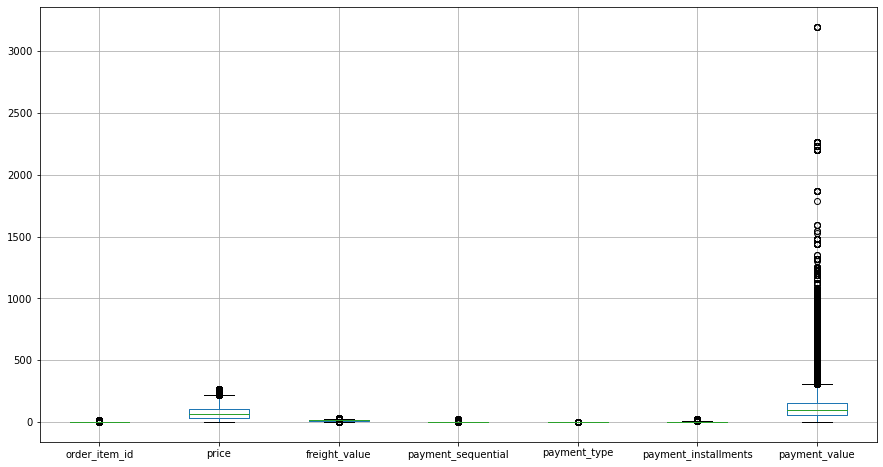

In [13]:
plt.figure(figsize=(15,8))
df.boxplot();

**We see in above boxplot that almost all variables are facing the outliers problem. so, we must have to treat this outliers problem before model building.**

## Univariate analysis

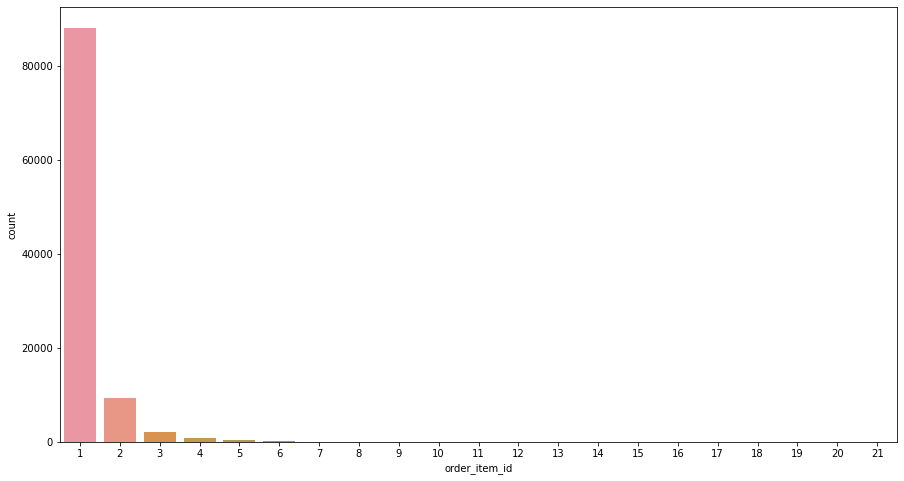

In [14]:
plt.figure(figsize=(15,8))
sns.countplot(df.order_item_id);

**We see countplot of order item id and we observe that highest number of orders done of those shoes which order id is 1,<br>
Second highest number of orders done of those shoes which order id is 2,<br>
Third highest number of orders done of those shoes which order id is 3,<br>
Lowest number of orders done of those shoes which order id is 21.**

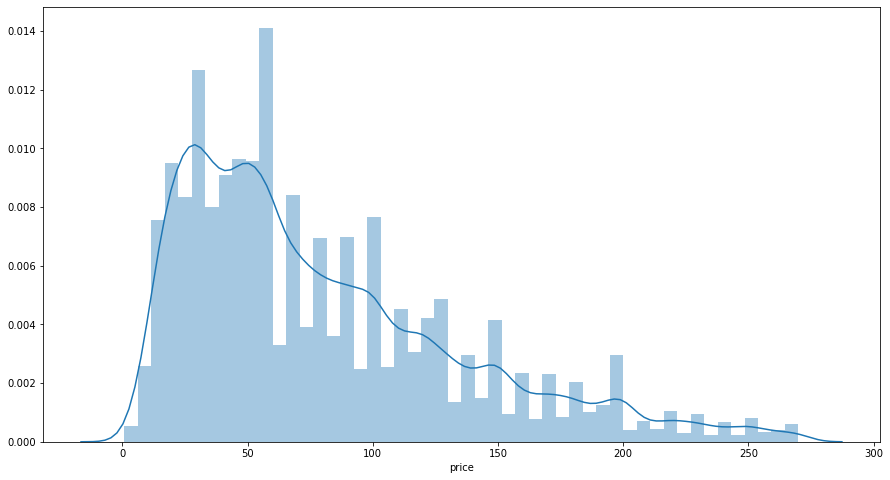

In [15]:
plt.figure(figsize=(15,8))
sns.distplot(df.price);

**We see histogram of price and we observe that most of shoes price is distributed between 0 to 100. we said this because highest peaks seen between this range and we also observe that distribution of price is not symettrical its skewed one(Positive skewness).**

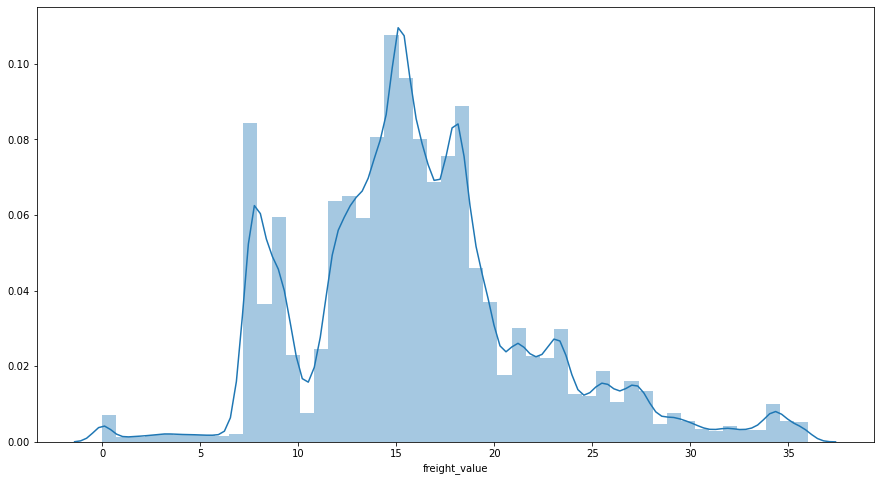

In [16]:
plt.figure(figsize=(15,8))
sns.distplot(df.freight_value);

**We see histogram of freight value and we observe that most of frieght value of shoes is between 5 to 20. we said this because highest peaks seen between this range and we also observe that distribution of freight value is nearly symettrical.**

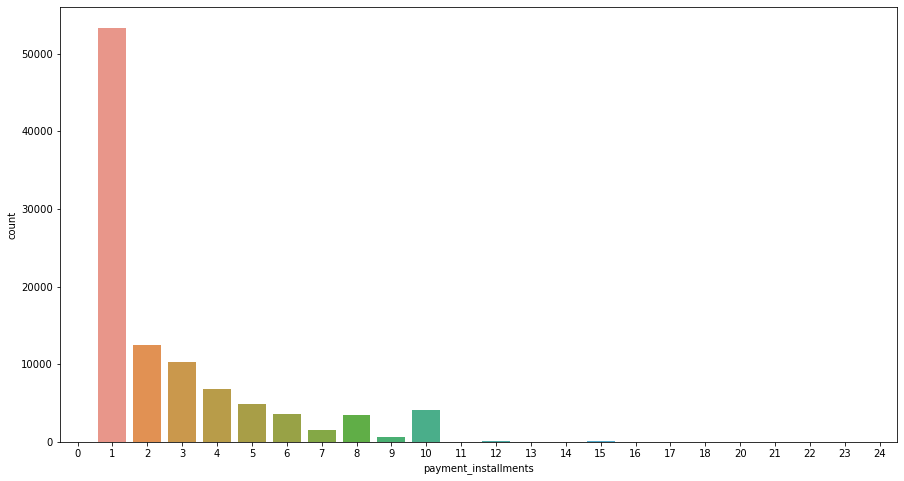

In [17]:
plt.figure(figsize=(15,8))
sns.countplot(df.payment_installments);

**We see in above countplot of payment installments and we observe that highest payment installment belong to 1,<br>
Second highest payment installment belong to 2,<br>
Third highest payment installment belong to 3.**

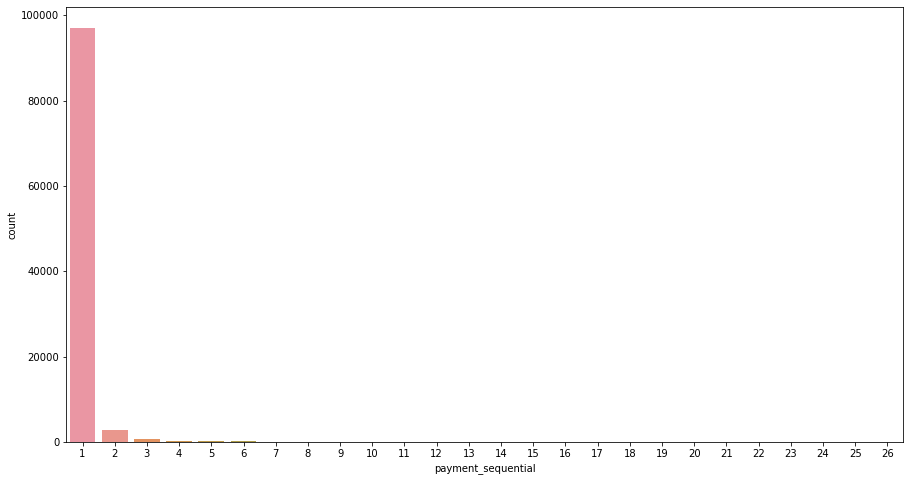

In [18]:
plt.figure(figsize=(15,8))
sns.countplot(df.payment_sequential);

**We see in above countplot of payment sequencial and we observe that highest sequence of payment belong to 1,<br>
Second highest sequence of payment belong to 2,<br>
Third highest sequence of payment belong to 3.**

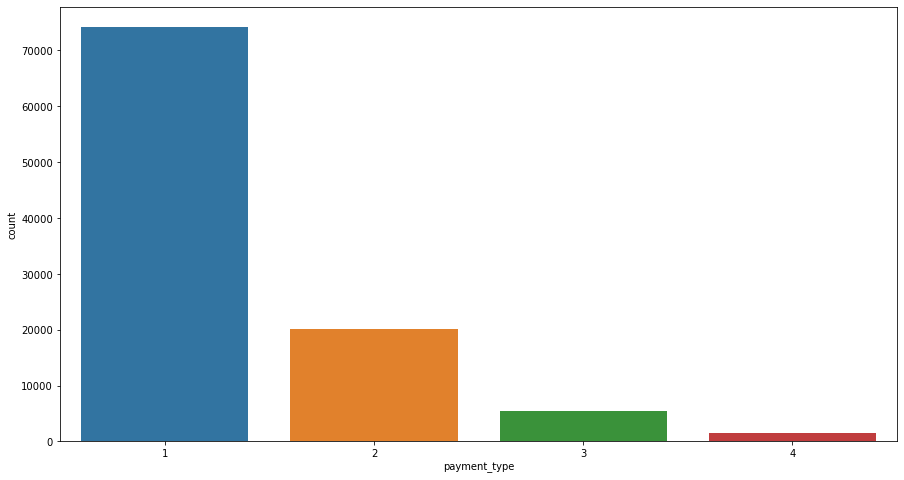

In [19]:
plt.figure(figsize=(15,8))
sns.countplot(df.payment_type);

**We see countplot of payment type and we observe that highest used payment type is 1,<br>
Second highest used payment type is 2,<br>
Third highest used payment type is 3,<br>
Least used payment type is 4.**

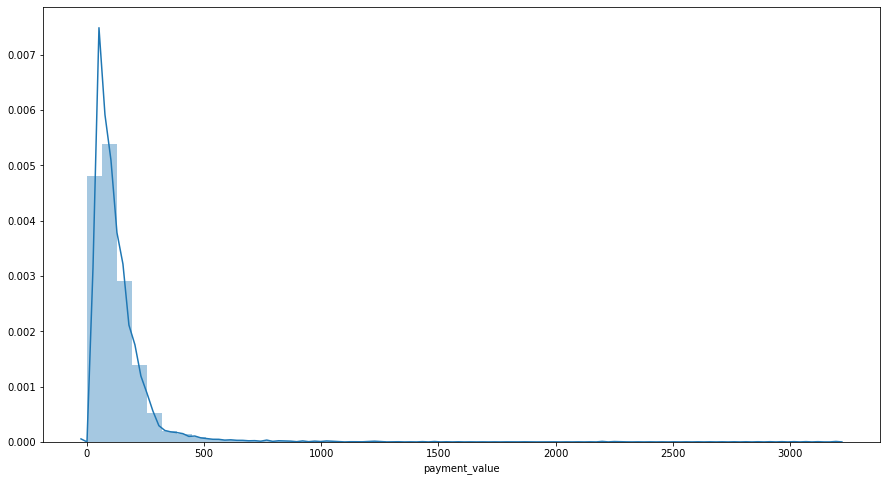

In [20]:
plt.figure(figsize=(15,8))
sns.distplot(df.payment_value);

**We see histogram of payment value and we observe that most of payment value is distributed between 0 to 500 and we said that because highest peaks seen between this range.<br>
We also observe that distribution of payment value is not symettric it is positively skewed.**

## Bivariate analysis

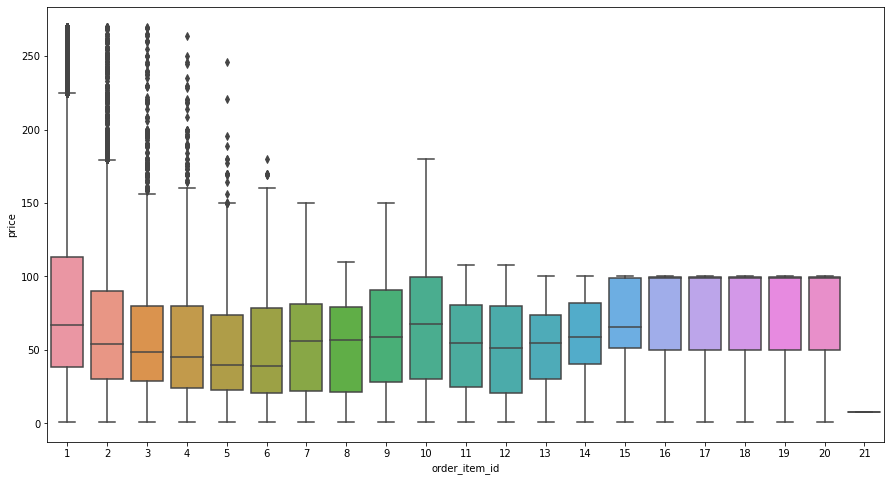

In [21]:
plt.figure(figsize=(15,8))
sns.boxplot(df.order_item_id,df.price);

**We see boxplot of order item id vs Price and based on median value and upper whisker we observe that highest price belong to order item id 1,<br>
Second highest price belong to order item id 10,<br>
Third highest price belong to order item id 2.<br>
We observe that price value is higher for order id 1 than it start decreasing upto order id 6 but after that price start increasing and reach its second highest value at order id 10 but after order id 10 it again start decreasing upto order id 12 then between 13 to 15 price start increasing but after order id 15 price become stable upto order id 20 but in order id 21 price decreasing and reach its lowest point.**

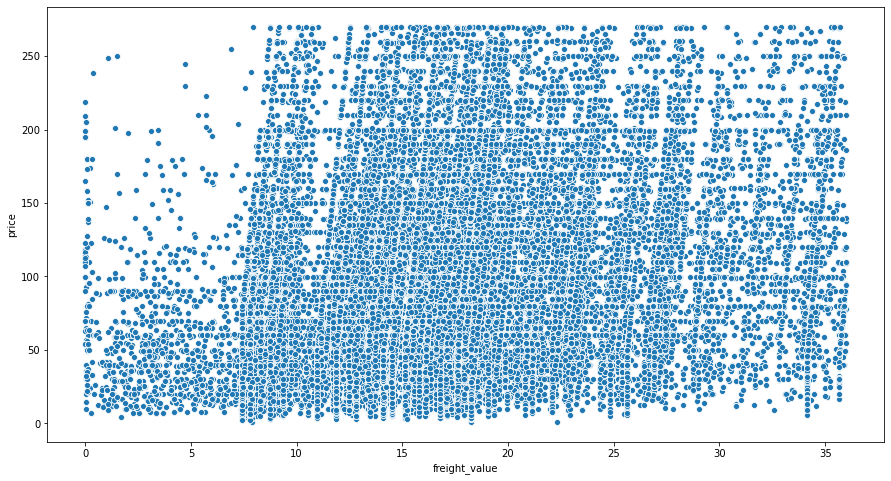

In [22]:
plt.figure(figsize=(15,8))
sns.scatterplot(df.freight_value,df.price);

**We see scatter plot of freight value vs price and we observe that its looks like cloud relationship between them because for single value of freight value there are multiple values of Price.**

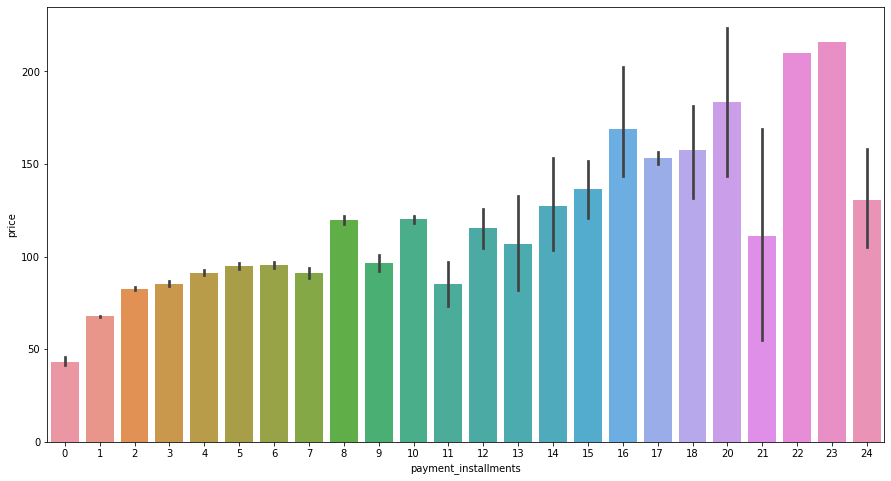

In [23]:
plt.figure(figsize=(15,8))
sns.barplot(df.payment_installments,df.price);

**We see barplot of payment installment vs price and we observe that installment 0 contain lowest price value but we observe one trend that if installment value increasing price is also increasing but there are some exception about this statement like upto installemnt 8 price is increasing but in installment 9 price is decreasing.<br>
we also observe that installment 22 and 23 contain the highest price than other installment but after installment 23 we seen sudden drop of price in installment 24.**

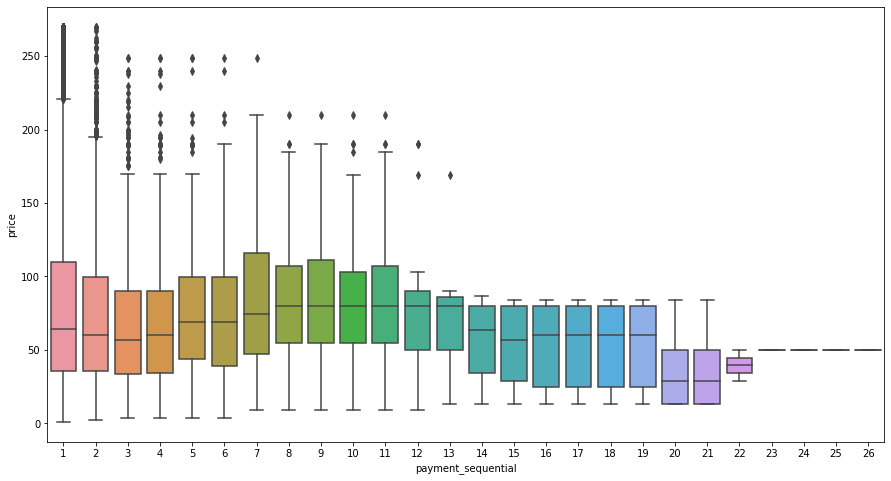

In [24]:
plt.figure(figsize=(15,8))
sns.boxplot(df.payment_sequential,df.price);

**We see boxplot of payment sequencial vs Price and we observe that there are many outliers present.**

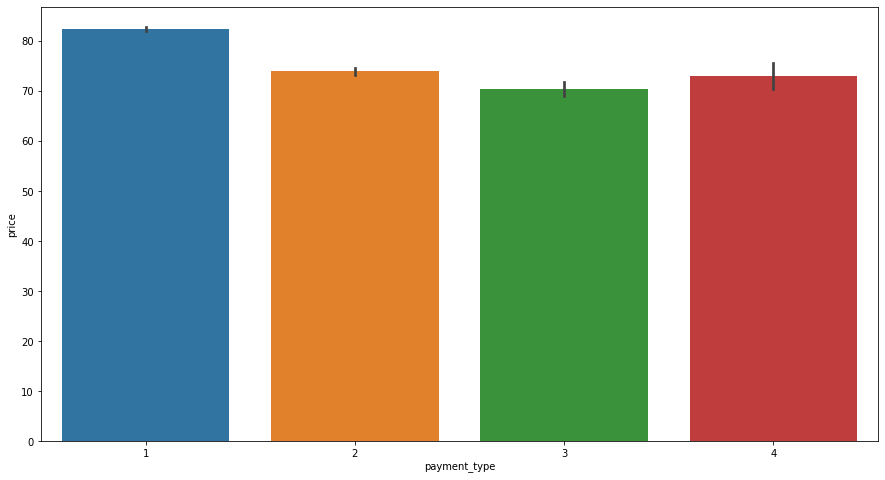

In [25]:
plt.figure(figsize=(15,8))
sns.barplot(df.payment_type,df.price);

**We see barplot of payment type vs Price and we observe that payment type 1 has highest price value, payment type 2 has second highest price value, payment type 4 has third highest price value and payment type 3 has lowest price value.**

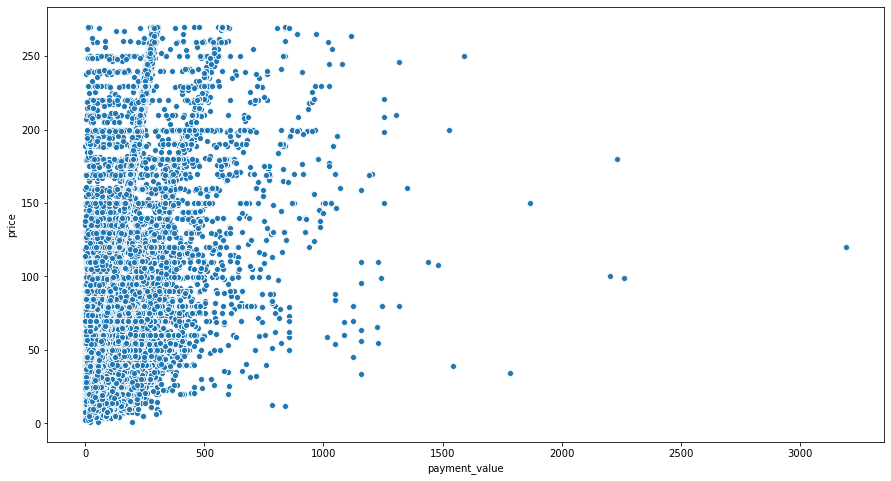

In [26]:
plt.figure(figsize=(15,8))
sns.scatterplot(df.payment_value,df.price);

**We see scatterplot of payment value vs price and we observe that at some point its look like moderate positive relationship between price and payment value but mostly it looks like cloud type relationship because for one point of payment value there are multiple values of price.**

## Multivariate analysis

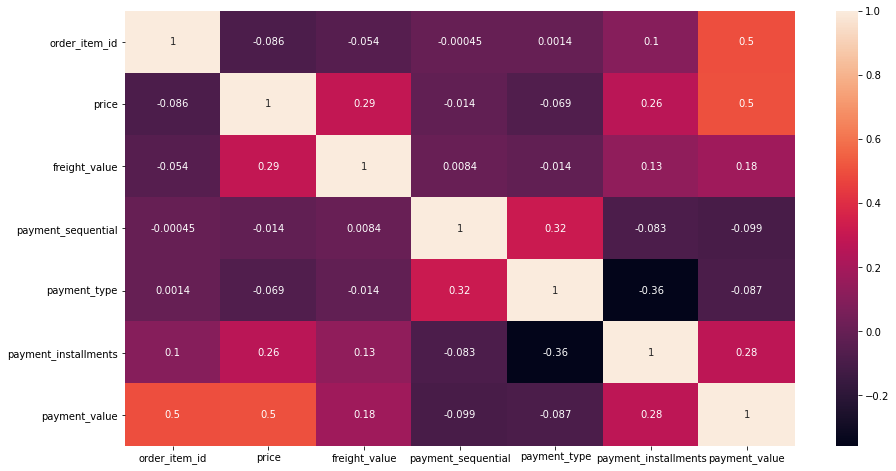

In [27]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True);

**We see heatmap of numerical variables and we observe that between Price and order item id negative correlation about -0.086, between Price and freight value positive correlation about 0.29, between Price and payment sequencial negative correlation about -0.014, between Price and payment type negative correlation about -0.069, between Price and payment installment positive correlation about 0.26 and between Price and payment value very strong positive correlation about 0.5.<br>
We also observe some strong positive and negative correlation between independent variables too like correlation between Payment value and order item id is about 0.5, correlation between Price and freight value is about 0.29. these are the positive correlation but there also negative correlation between independent variables like correlation between payment type and payment installment is -0.36, correlation between payment installment and payment sequencial is about -0.083.**


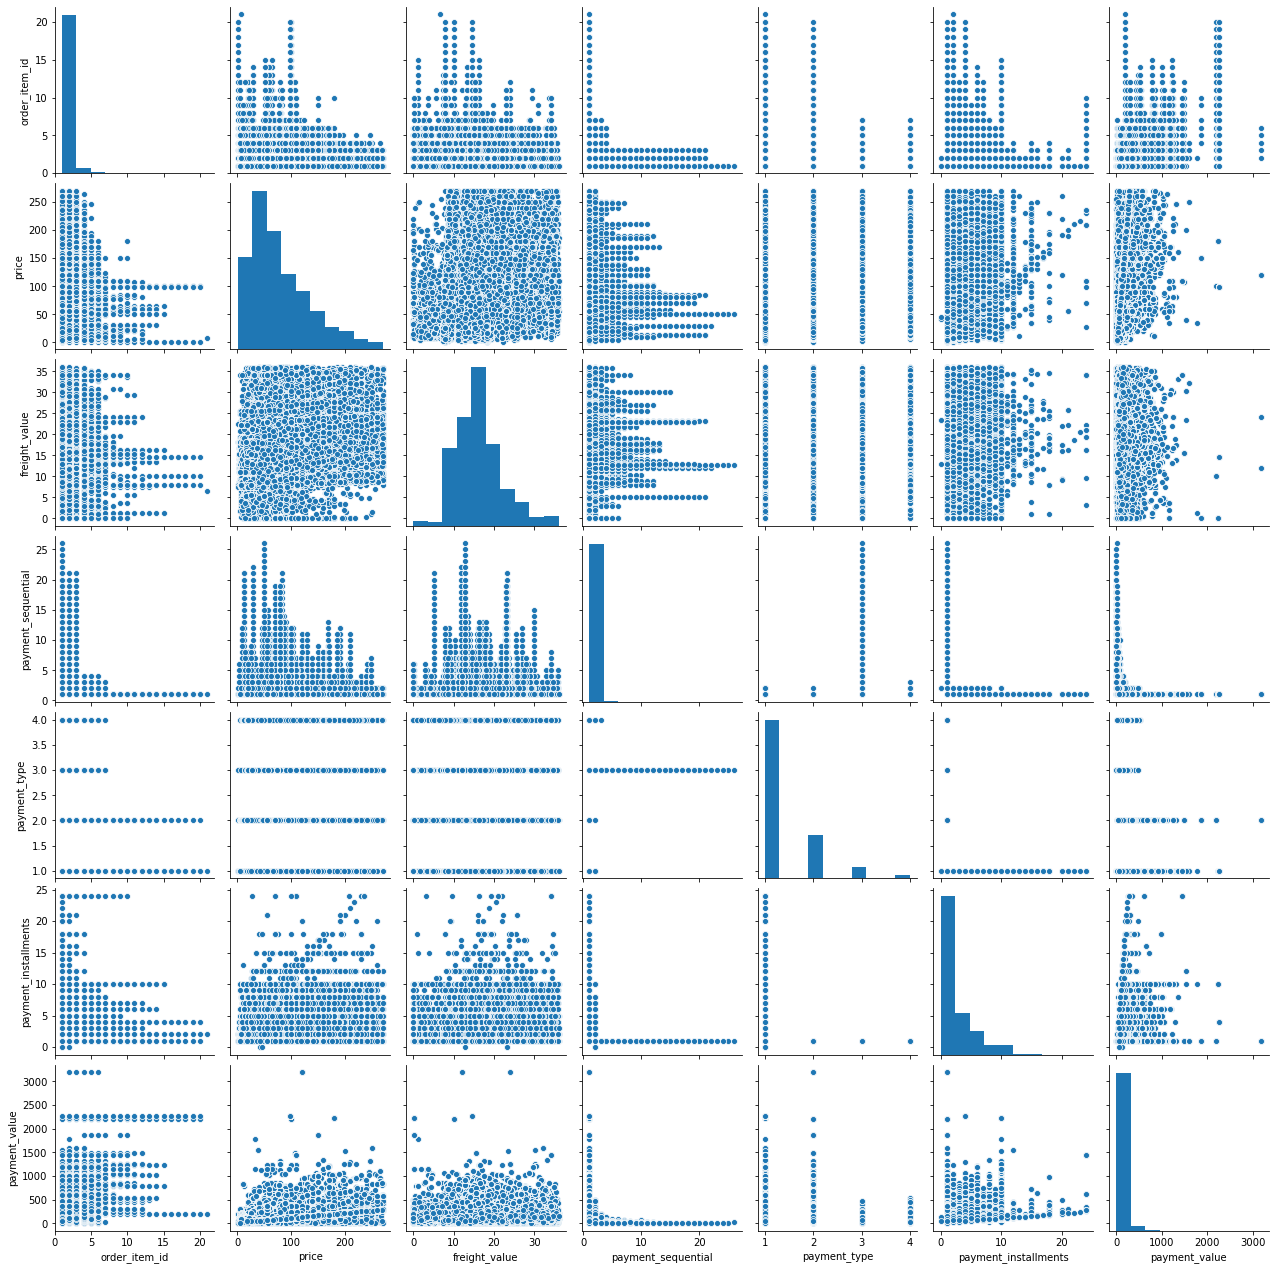

In [28]:
sns.pairplot(df);

**We see paiplot of numerical variable and as we know it is regression problem so rather than to check diagonals we check the other matrix of graphs and we observe that there are no clear positive or negative relationship between price and other independent variable or between independents variable. there are seems like moderate relationship between Price and other independent variables or between independent variables.**

## Outliers Treatment

In [29]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [30]:
for column in df.columns:
    if df[column].dtype != 'object':
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])

**For treatment of outliers we use the IQR capping method in which we cap the outliers at the upper(Q3 + 1.5IQR) and lower(Q1 - 1.5IQR) limit.**

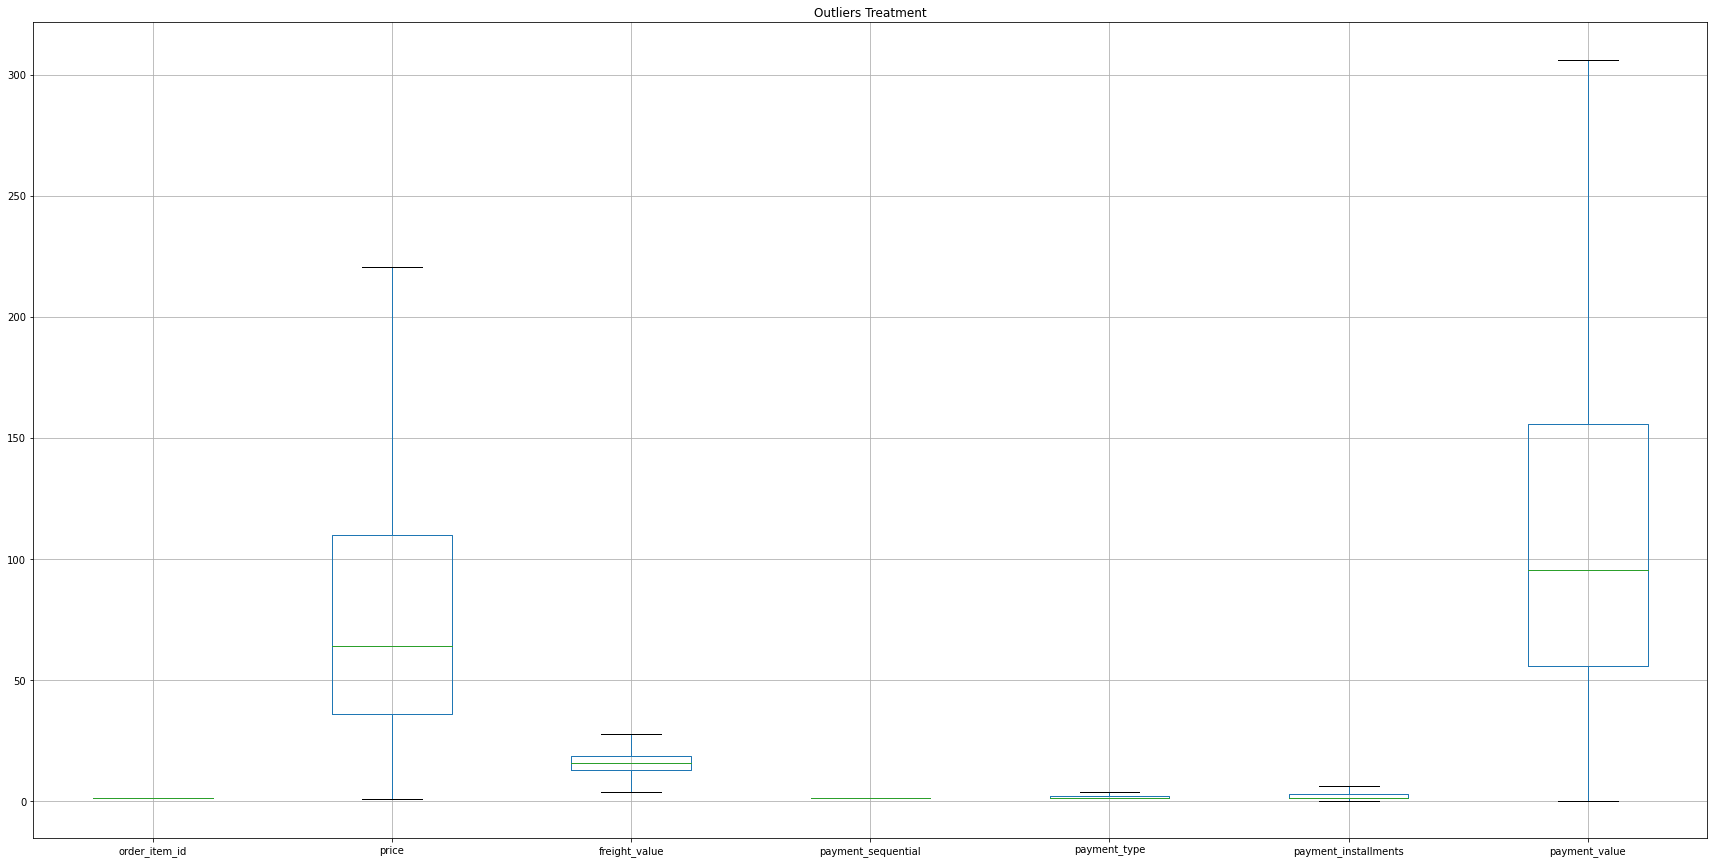

In [31]:
plt.figure(figsize=(30,15))
df.boxplot()
plt.title('Outliers Treatment')
plt.show()

## Checking Multicolinearity

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [33]:
X = df.drop('price',axis=1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

C:\Users\VISHAL\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,variables,VIF
4,payment_installments,1.347969
3,payment_type,1.218397
5,payment_value,1.195149
1,freight_value,1.083032
0,order_item_id,0.000000
2,payment_sequential,0.000000


## Model Building

In [34]:
x=df.drop('price',axis=1)
y=df.pop('price')

**For model building we have to seperate dependent and independent variable first and as we know that Price is dependent variable and rest all are independent variables. so first we separate them before start the model building.**

In [35]:
x.head()

,order_item_id,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,1.0,13.29,1.0,1.0,2.0,72.19
1,1.0,19.93,1.0,1.0,3.0,259.83
2,1.0,17.87,1.0,1.0,5.0,216.87
3,1.0,12.79,1.0,1.0,2.0,25.78
4,1.0,18.14,1.0,1.0,3.0,218.04


In [36]:
y.head()

0     58.900
1    220.765
2    199.000
3     12.990
4    199.900
Name: price, dtype: float64

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

**We split the dataset into train and test and we split the dataset into 70:30 ratio. so, we build the model on train set and evaluate those model on test set.**

In [38]:
x_train

,order_item_id,freight_value,payment_sequential,payment_type,payment_installments,payment_value
66307,1.0,18.73,1.0,1.0,2.0,88.720
8719,1.0,15.38,1.0,2.0,1.0,306.275
23243,1.0,13.37,1.0,2.0,1.0,52.370
70681,1.0,25.63,1.0,1.0,1.0,47.630
2877,1.0,13.81,1.0,1.0,2.0,153.800
...,...,...,...,...,...,...
50057,1.0,23.70,1.0,1.0,6.0,142.700
98047,1.0,12.48,1.0,1.0,4.0,62.380
5192,1.0,21.19,1.0,3.5,1.0,121.090
77708,1.0,19.25,1.0,1.0,6.0,306.275


In [39]:
y_train

66307     69.99
8719      89.90
23243     39.00
70681     22.00
2877     139.99
          ...  
50057    119.00
98047     49.90
5192      99.90
77708    144.90
98539    139.00
Name: price, Length: 70934, dtype: float64

In [40]:
x_test

,order_item_id,freight_value,payment_sequential,payment_type,payment_installments,payment_value
7600,1.0,18.13,1.0,3.0,1.0,28.89
88760,1.0,15.10,1.0,2.0,1.0,30.00
77559,1.0,13.96,1.0,1.0,1.0,68.86
88964,1.0,22.87,1.0,1.0,2.0,156.87
34802,1.0,24.61,1.0,1.0,1.0,61.61
...,...,...,...,...,...,...
36878,1.0,23.00,1.0,1.0,1.0,102.90
81748,1.0,14.11,1.0,1.0,2.0,124.01
91076,1.0,18.20,1.0,1.0,2.0,153.20
23554,1.0,15.23,1.0,2.0,1.0,65.22


## Linear regression

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [42]:
lm=LinearRegression()

In [43]:
lm.fit(x_train,y_train)

LinearRegression()

In [44]:
lr_acc_train=lm.score(x_train,y_train)
lr_acc_train

0.49542789949083443

In [45]:
lr_acc_test=lm.score(x_test,y_test)
lr_acc_test

0.5061979791674689

In [46]:
predicted_train=lm.predict(x_train)
lr_RMSE_train=np.sqrt(metrics.mean_squared_error(y_train,predicted_train))
lr_RMSE_train

38.616769331887255

In [47]:
predicted_test=lm.predict(x_test)
lr_RMSE_test=np.sqrt(metrics.mean_squared_error(y_test,predicted_test))
lr_RMSE_test

38.131861213698095

## Decision Tree

In [48]:
from sklearn.tree import DecisionTreeRegressor

In [49]:
dt_model = DecisionTreeRegressor()

In [50]:
dt_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [51]:
dt_acc_train=dt_model.score(x_train,y_train)
dt_acc_train

0.9884996803072281

In [52]:
dt_acc_test=dt_model.score(x_test,y_test)
dt_acc_test

0.7605349664732607

In [53]:
dt_predicted_train=dt_model.predict(x_train)
dt_RMSE_train=np.sqrt(metrics.mean_squared_error(y_train,dt_predicted_train))
dt_RMSE_train

5.8300097093513665

In [54]:
dt_predicted_test=dt_model.predict(x_test)
dt_RMSE_test=np.sqrt(metrics.mean_squared_error(y_test,dt_predicted_test))
dt_RMSE_test

26.554163548229994

## Regularised Decision tree

In [55]:
reg_dt_model = DecisionTreeRegressor( criterion='mse', max_depth=30,
                      min_samples_leaf=5, min_samples_split=30,
                      random_state=1, splitter='best')

In [56]:
reg_dt_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=30, min_samples_leaf=5, min_samples_split=30,
                      random_state=1)

In [57]:
reg_dt_acc_train=reg_dt_model.score(x_train,y_train)
reg_dt_acc_train

0.8148808341404997

In [58]:
reg_dt_acc_test=reg_dt_model.score(x_test,y_test)
reg_dt_acc_test

0.7303253221261995

In [59]:
reg_dt_predicted_train=reg_dt_model.predict(x_train)
reg_dt_RMSE_train=np.sqrt(metrics.mean_squared_error(y_train,reg_dt_predicted_train))
reg_dt_RMSE_train

23.39052737430846

In [60]:
reg_dt_predicted_test=reg_dt_model.predict(x_test)
reg_dt_RMSE_test=np.sqrt(metrics.mean_squared_error(y_test,reg_dt_predicted_test))
reg_dt_RMSE_test

28.179394467638932

## Random Forest

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
rfcl = RandomForestRegressor()
rfcl = rfcl.fit(x_train,y_train)

In [63]:
rfcl

RandomForestRegressor()

In [64]:
rfcl_acc_train=rfcl.score(x_train,y_train)
rfcl_acc_train

0.9679071488907254

In [65]:
rfcl_acc_test=rfcl.score(x_test,y_test)
rfcl_acc_test

0.8391823240638916

In [66]:
RF_y_train_predict = rfcl.predict(x_train)
RF_y_test_predict = rfcl.predict(x_test)

In [67]:
rfcl_RMSE_train=np.sqrt(metrics.mean_squared_error(y_train,RF_y_train_predict))
rfcl_RMSE_train

9.739092081172503

In [68]:
rfcl_RMSE_test=np.sqrt(metrics.mean_squared_error(y_test,RF_y_test_predict))
rfcl_RMSE_test

21.760980662427055

## Regularise Random forest

In [69]:
reg_rfcl = RandomForestRegressor(criterion='mse', max_depth=25,
                      min_samples_leaf=3, min_samples_split=20,
                      random_state=1)
reg_rfcl = reg_rfcl.fit(x_train,y_train)

In [70]:
reg_rfcl

RandomForestRegressor(max_depth=25, min_samples_leaf=3, min_samples_split=20,
                      random_state=1)

In [71]:
rfcl_acc_train1=reg_rfcl.score(x_train,y_train)
rfcl_acc_train1

0.8516770980398009

In [72]:
rfcl_acc_test1=reg_rfcl.score(x_test,y_test)
rfcl_acc_test1

0.7814313123730748

In [73]:
RF_y_train_predict1 = reg_rfcl.predict(x_train)
RF_y_test_predict1 = reg_rfcl.predict(x_test)

In [74]:
rfcl_RMSE_train1=np.sqrt(metrics.mean_squared_error(y_train,RF_y_train_predict1))
rfcl_RMSE_train1

20.93719164714935

In [75]:
rfcl_RMSE_test1=np.sqrt(metrics.mean_squared_error(y_test,RF_y_test_predict1))
rfcl_RMSE_test1

25.369128281995206

In [76]:
print (pd.DataFrame(reg_rfcl.feature_importances_, columns = ["Imp"], index = x_train.columns))

                           Imp
order_item_id         0.000000
freight_value         0.194251
payment_sequential    0.000000
payment_type          0.014898
payment_installments  0.011398
payment_value         0.779453


## Ada boost

In [77]:
from sklearn.ensemble import AdaBoostRegressor

ADB_model = AdaBoostRegressor()
ADB_model.fit(x_train,y_train)

AdaBoostRegressor()

In [78]:
adb_acc_train=ADB_model.score(x_train,y_train)
adb_acc_train

0.5399268611494309

In [79]:
adb_acc_test=ADB_model.score(x_test,y_test)
adb_acc_test

0.5458616165265173

In [80]:
ADB_y_train_predict = ADB_model.predict(x_train)
ADB_y_test_predict = ADB_model.predict(x_test)

In [81]:
adb_RMSE_train=np.sqrt(metrics.mean_squared_error(y_train,ADB_y_train_predict))
adb_RMSE_train

36.874637561410765

In [82]:
adb_RMSE_test=np.sqrt(metrics.mean_squared_error(y_test,ADB_y_test_predict))
adb_RMSE_test

36.568376279888156

## Gradient Boost

In [83]:
from sklearn.ensemble import GradientBoostingRegressor
gbcl = GradientBoostingRegressor()
gbcl = gbcl.fit(x_train, y_train)

In [84]:
gbcl_acc_train=gbcl.score(x_train,y_train)
gbcl_acc_train

0.6346631038510153

In [85]:
gbcl_acc_test=gbcl.score(x_test,y_test)
gbcl_acc_test

0.6406738700793959

In [86]:
GB_y_train_predict = gbcl.predict(x_train)
GB_y_test_predict = gbcl.predict(x_test)

In [87]:
gbcl_RMSE_train=np.sqrt(metrics.mean_squared_error(y_train,GB_y_train_predict))
gbcl_RMSE_train

32.85951043890774

In [88]:
gbcl_RMSE_test=np.sqrt(metrics.mean_squared_error(y_test,GB_y_test_predict))
gbcl_RMSE_test

32.52789595779962

## Regularised Gradient Boost

In [89]:
from sklearn.ensemble import GradientBoostingRegressor
gbcl1 = GradientBoostingRegressor(criterion='mse', max_depth=20,
                      min_samples_leaf=10, min_samples_split=35,
                      random_state=1)
gbcl1 = gbcl1.fit(x_train, y_train)

In [90]:
gbcl_acc_train1=gbcl1.score(x_train,y_train)
gbcl_acc_train1

0.908935680574634

In [91]:
gbcl_acc_test1=gbcl1.score(x_test,y_test)
gbcl_acc_test1

0.8163249253620688

In [92]:
GB_y_train_predict1 = gbcl1.predict(x_train)
GB_y_test_predict1 = gbcl1.predict(x_test)

In [93]:
reg_gbcl_RMSE_train=np.sqrt(metrics.mean_squared_error(y_train,GB_y_train_predict1))
reg_gbcl_RMSE_train

16.40546121734302

In [94]:
reg_gbcl_RMSE_test=np.sqrt(metrics.mean_squared_error(y_test,GB_y_test_predict1))
reg_gbcl_RMSE_test

23.256089210549646

## Bagging

In [95]:
from sklearn.ensemble import BaggingRegressor
Bagging_model=BaggingRegressor(n_estimators=30,random_state=1)
Bagging_model.fit(x_train, y_train)

BaggingRegressor(n_estimators=30, random_state=1)

In [96]:
bag_acc_train=Bagging_model.score(x_train,y_train)
bag_acc_train

0.9659700553302325

In [97]:
bag_acc_test=Bagging_model.score(x_test,y_test)
bag_acc_test

0.8345620668284159

In [98]:
bag_y_train_predict = Bagging_model.predict(x_train)
bag_y_test_predict = Bagging_model.predict(x_test)

In [99]:
bag_RMSE_train=np.sqrt(metrics.mean_squared_error(y_train,bag_y_train_predict))
bag_RMSE_train

10.028706994838776

In [100]:
bag_RMSE_test=np.sqrt(metrics.mean_squared_error(y_test,bag_y_test_predict))
bag_RMSE_test

22.071361302651145

## Compare all model

In [101]:
index=['Linear Regression','Decision Tree','Reg Decision Tree','Random forest','Reg Random forest','Ada boost','Gradient Boost','Reg Gradient Boost','bagging',]
data2 = pd.DataFrame({'Accuracy Train':[lr_acc_train,dt_acc_train,reg_dt_acc_train,rfcl_acc_train,rfcl_acc_train1,adb_acc_train,gbcl_acc_train,gbcl_acc_train1,bag_acc_train,],
        'Accuracy Test':[lr_acc_test,dt_acc_test,reg_dt_acc_test,rfcl_acc_test,rfcl_acc_test1,adb_acc_test,gbcl_acc_test,gbcl_acc_test1,bag_acc_test,],
        'RMSE Train':[lr_RMSE_train,dt_RMSE_train,reg_dt_RMSE_train,rfcl_RMSE_train,rfcl_RMSE_train1,adb_RMSE_train,gbcl_RMSE_train,reg_gbcl_RMSE_train,bag_RMSE_train,],
        'RMSE Test':[lr_RMSE_test,dt_RMSE_test,reg_dt_RMSE_test,rfcl_RMSE_test,rfcl_RMSE_test1,adb_RMSE_test,gbcl_RMSE_test,reg_gbcl_RMSE_test,bag_RMSE_test,],  },index=index)
round(data2,2)

,Accuracy Train,Accuracy Test,RMSE Train,RMSE Test
Linear Regression,0.50,0.51,38.62,38.13
Decision Tree,0.99,0.76,5.83,26.55
Reg Decision Tree,0.81,0.73,23.39,28.18
Random forest,0.97,0.84,9.74,21.76
Reg Random forest,0.85,0.78,20.94,25.37
Ada boost,0.54,0.55,36.87,36.57
Gradient Boost,0.63,0.64,32.86,32.53
Reg Gradient Boost,0.91,0.82,16.41,23.26
bagging,0.97,0.83,10.03,22.07


**We seen in above table that regularised random forest and regularised gradient boost model peform very well on this dataset and given very good accuracy and RMSE value for train and test set but we want the better explainablity too so i go with random forest model for predicting shoe price of ZSHOE.com**